In [1]:
from gdpyt import GdpytImageCollection, GdpytCalibrationSet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [2]:
folder = r'C:\Users\silus\UCSB\master_thesis\python_stuff\gdpyt\tests\test_data\chip2test1\50X\calib'
filetype = '.tif'
processing = {
    'cv2.medianBlur': {'args': [9]},
    'cv2.bilateralFilter': {'args': [9, 10, 10]}}

collection = GdpytImageCollection(folder, filetype, processing_specs=processing,
                                  min_particle_size=100)
collection.uniformize_particle_ids()

Found 56 files with filetype .tif in folder C:\Users\silus\UCSB\master_thesis\python_stuff\gdpyt\tests\test_data\chip2test1\50X\calib
Loaded image calib_0.tif
Loaded image calib_1.tif
Loaded image calib_10.tif
Loaded image calib_11.tif
Loaded image calib_12.tif
Loaded image calib_13.tif
Loaded image calib_14.tif
Loaded image calib_15.tif
Loaded image calib_16.tif
Loaded image calib_17.tif
Loaded image calib_18.tif
Loaded image calib_19.tif
Loaded image calib_2.tif
Loaded image calib_20.tif
Loaded image calib_21.tif
Loaded image calib_22.tif
Loaded image calib_23.tif
Loaded image calib_24.tif
Loaded image calib_25.tif
Loaded image calib_26.tif
Loaded image calib_27.tif
Loaded image calib_28.tif
Loaded image calib_29.tif
Loaded image calib_3.tif
Loaded image calib_30.tif
Loaded image calib_31.tif
Loaded image calib_32.tif
Loaded image calib_33.tif
Loaded image calib_34.tif
Loaded image calib_35.tif
Loaded image calib_36.tif
Loaded image calib_37.tif
Loaded image calib_38.tif
Loaded image

In [ ]:
fig = collection.plot(raw=False, draw_particles=True)
fig.show()

## Create a calibration set from these images

In [3]:
name_to_z = {}
for image in collection.images.values():
    name_to_z.update({image.filename: float(image.filename.split('_')[-1].split('.')[0])})

exclude = [img_name for img_name, z in name_to_z.items() if z > 45.0]
print("Images to exclude in calibration: {}".format(exclude))

calib_set = collection.create_calibration(name_to_z, exclude=exclude)

Images to exclude in calibration: ['calib_46.tif', 'calib_47.tif', 'calib_48.tif', 'calib_49.tif', 'calib_50.tif', 'calib_51.tif', 'calib_52.tif', 'calib_53.tif', 'calib_54.tif', 'calib_55.tif']


Let's look at the calibration stack for particle ID 3:

<IPython.core.display.Javascript object>


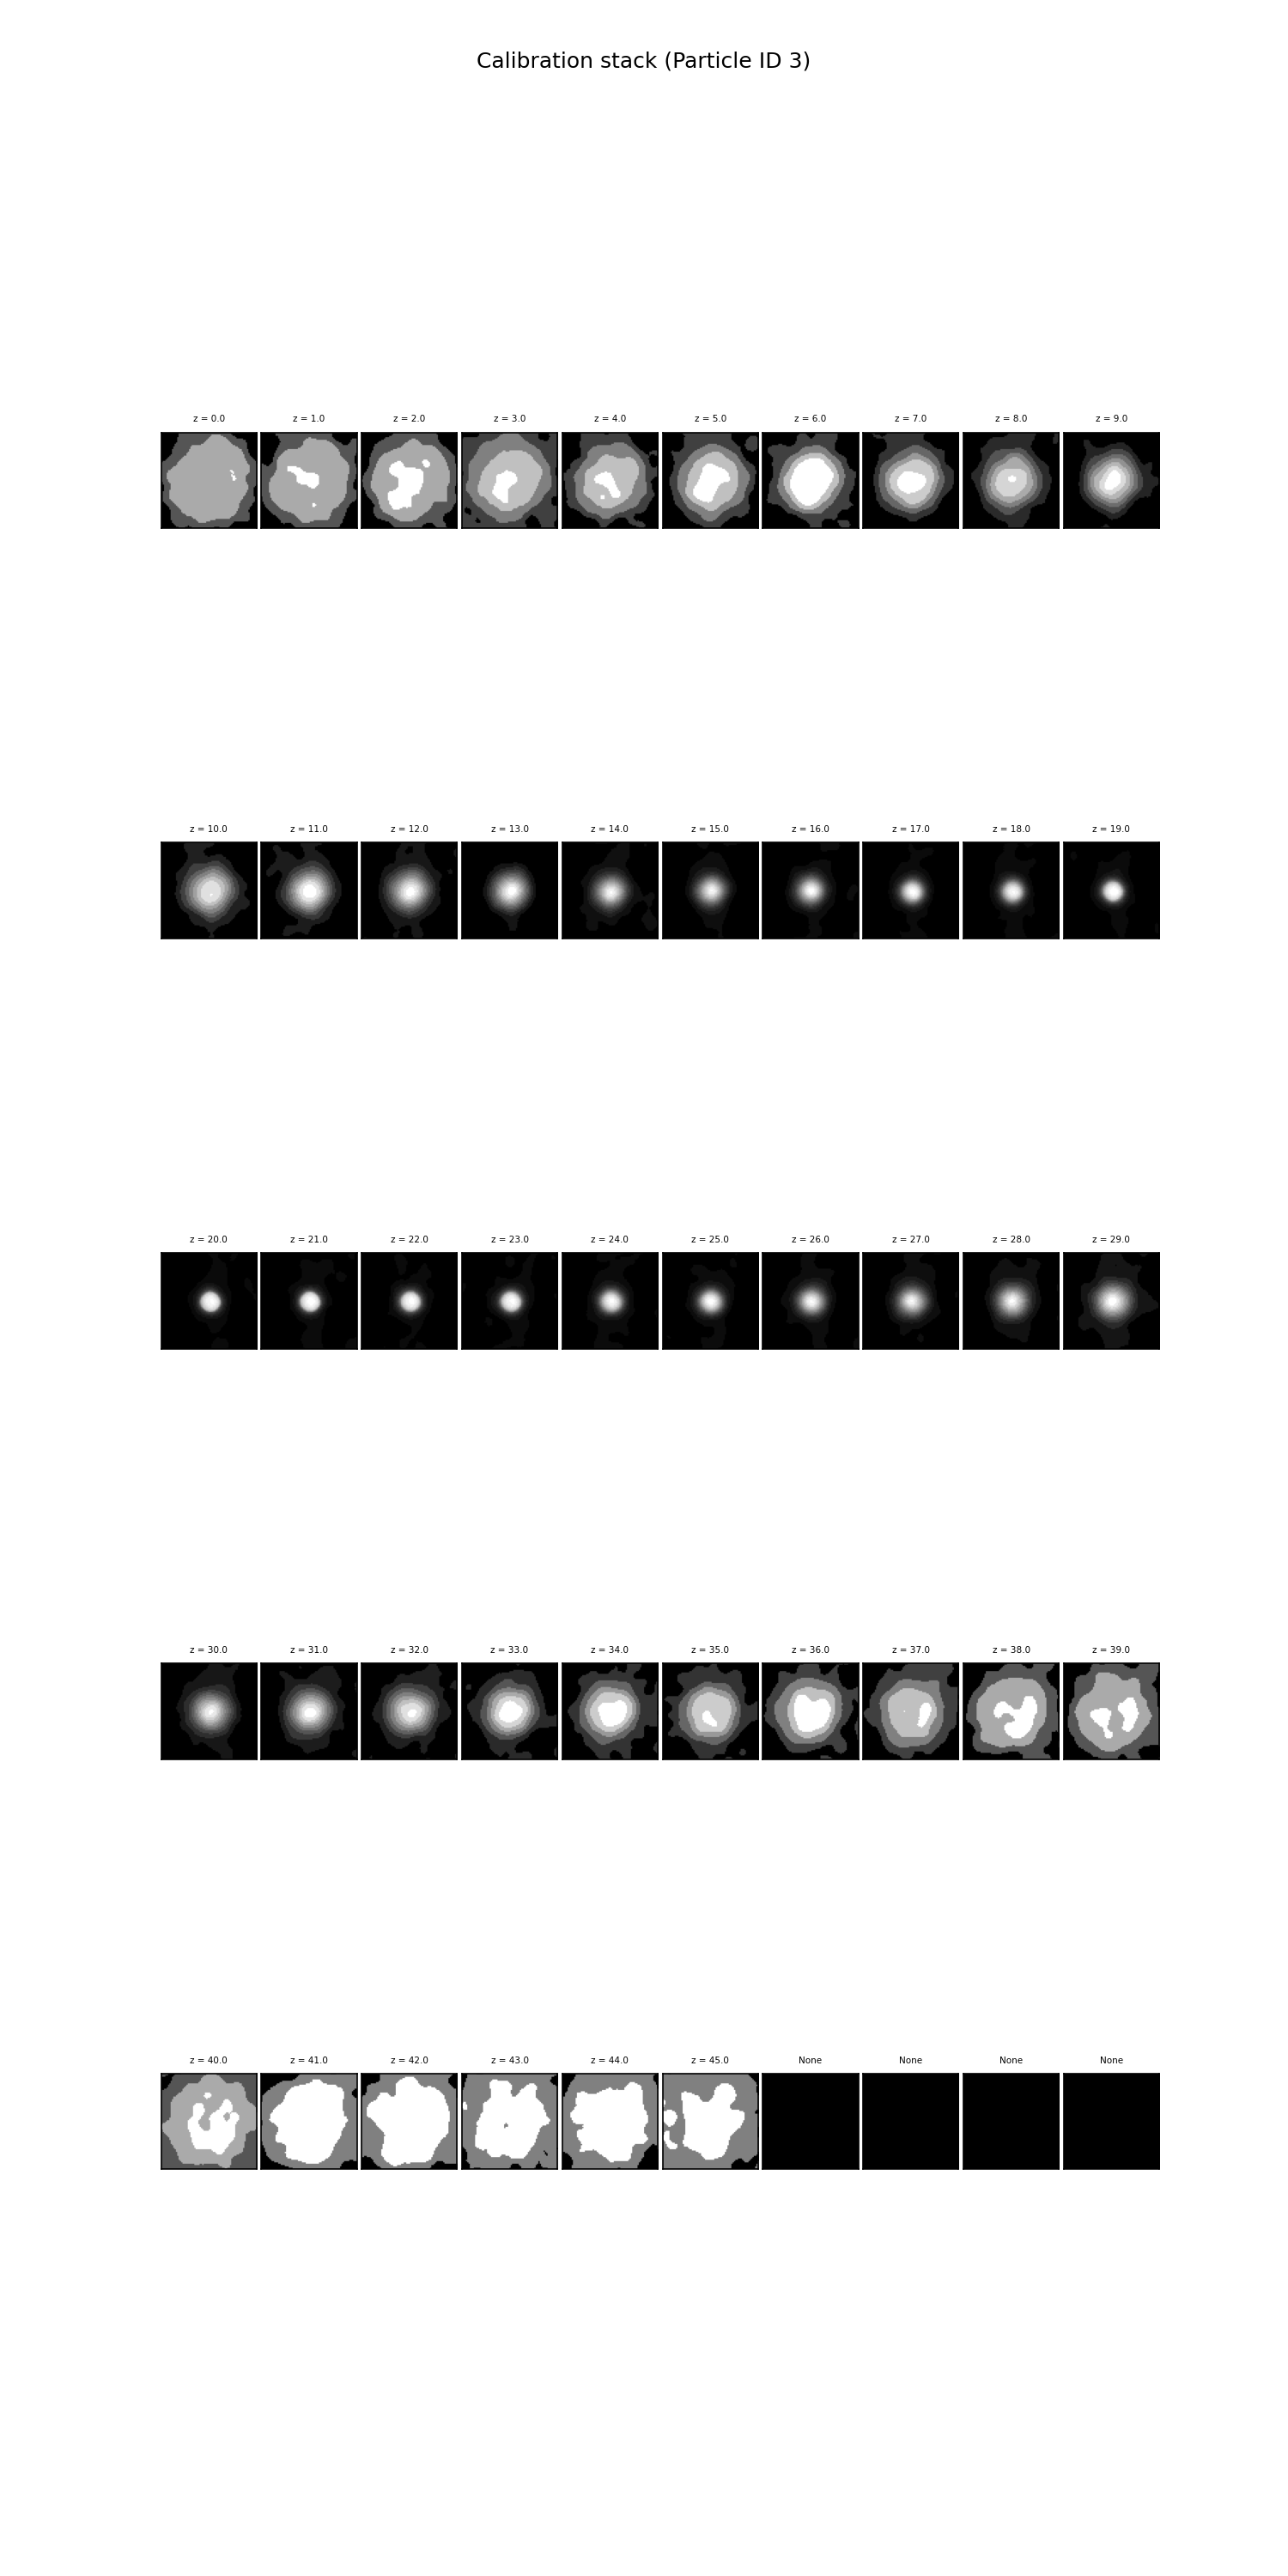

In [4]:
get_stack_id = 3
stack3 = calib_set.calibration_stacks[get_stack_id]
fig = stack3.plot()
fig.show()

## Infering the height of particles on test images using this calibration

In [5]:
test_folder = r'C:\Users\silus\UCSB\master_thesis\python_stuff\gdpyt\tests\test_data\chip2test1\50X\test\chip1_E5_P2_f1_Obj50X_FPNR5_run_4'
filetype = '.tif'
test_collection = GdpytImageCollection(test_folder, filetype, processing_specs=processing,
                                  min_particle_size=100)

# The particle IDs in the test sets must match the ones in the calibration set so use the calibration set as the baseline 
# for ID uniformization
test_collection.uniformize_particle_ids(baseline=calib_set)


Found 120 files with filetype .tif in folder C:\Users\silus\UCSB\master_thesis\python_stuff\gdpyt\tests\test_data\chip2test1\50X\test\chip1_E5_P2_f1_Obj50X_FPNR5_run_4
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_0.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_1.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_10.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_100.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_101.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_102.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_103.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_104.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_105.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_106.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_107.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_108.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_109.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_11.tif
Loaded image chip1_E5_P2_f1_Obj50X_FPNR5_run_4_110.tif
Loaded image 

In [ ]:
fig = test_collection.plot(raw=False, draw_particles=True)
fig.show()

In [6]:
# Infer height using zero normalized cross correlation
test_collection.infer_z(calib_set, function='znccorr')

In [7]:
particle = test_collection[1].get_particle(3)
# Returns a list (with one element)
particle

In [9]:
particle[0].similarity_curve.head()

,z,S_ZNCCORR
0,0.0,0.207440
1,1.0,0.386307
2,2.0,0.404213
3,3.0,0.432882
4,4.0,0.448030


<IPython.core.display.Javascript object>


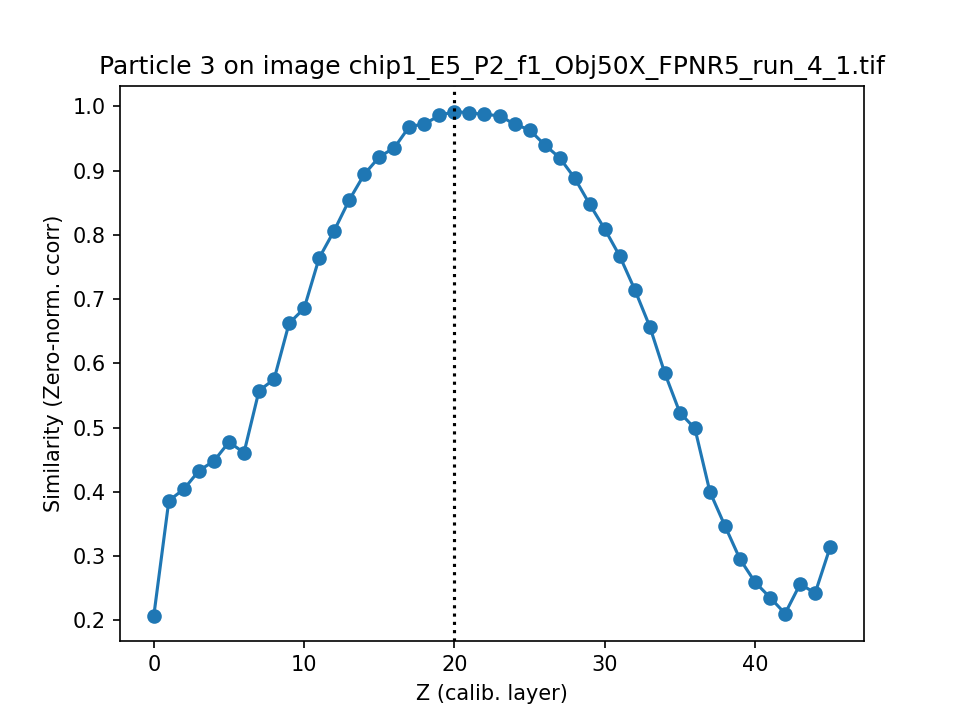

In [11]:
plt.figure()
plt.plot(particle[0].similarity_curve['z'], particle[0].similarity_curve['S_ZNCCORR'], marker='o')
plt.xlabel('Z (calib. layer)')
plt.ylabel('Similarity (Zero-norm. ccorr)')
plt.title('Particle 3 on image {}'.format(test_collection[1].filename))
plt.axvline(particle[0].z, linestyle=':', color='k')

Particle template and layer of the calibration stack that returned the maximum:

<IPython.core.display.Javascript object>


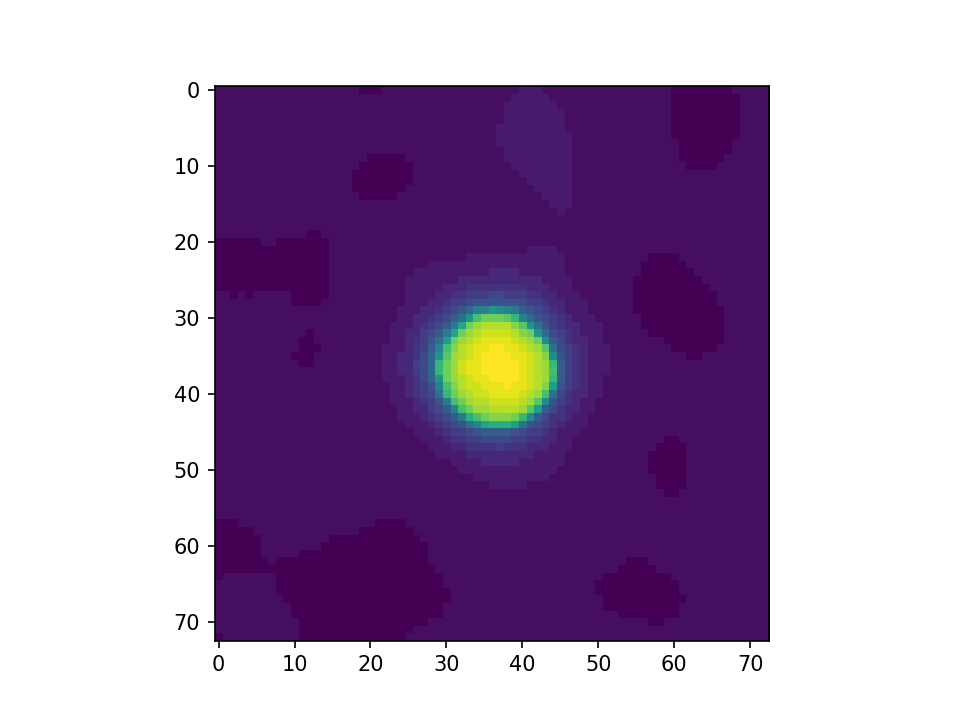

In [12]:
plt.figure()
plt.imshow(particle[0].template)

<IPython.core.display.Javascript object>


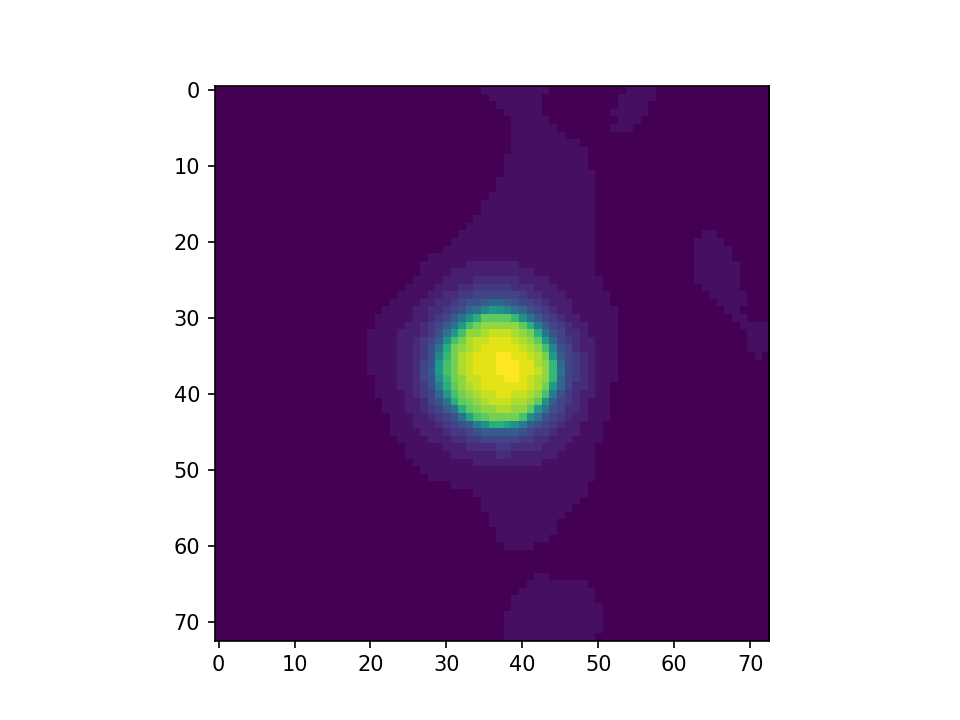

In [14]:
plt.figure()
plt.imshow(stack3.layers[particle[0].z])